# Chapter 12: Getting Back to Basics: The Music21Object

In [1]:
from music21 import *

## Music21Object

Def: A ***Music21Object*** is something that can go in a *Stream*, knows where it is in a Stream, and has a *Duration* at *.duration*

But, not every object in *music21* is a “Music21Object”

In [2]:
p = pitch.Pitch("A-2")
s = stream.Stream()
d = duration.Duration('half')
#  the Pitch object and the Duration object are not Music21Object

If you run the following codes, you would get an error!!! Thus I add a "#" here. 

In [3]:
# s.insert(0, p)
# s.insert(0, d)

Why not make everything a Music21Object : The overhead is time consuming

The *Note* object is suitable 

In [4]:
n = note.Note('A-2', type='half')
s.insert(0, n)
s.show('text')

{0.0} <music21.note.Note A->


The class of an object cannot (well, should not) change after it’s been created.

In [5]:
note.Note().classes

('Note', 'NotRest', 'GeneralNote', 'Music21Object', 'ProtoM21Object', 'object')

In [6]:
note.Rest().classes

('Rest', 'GeneralNote', 'Music21Object', 'ProtoM21Object', 'object')

Streams have many ways of filtering out Music21Objects according to class. The easiest way is with ***.getElementsByClass***

In [7]:
s = stream.Stream()
s.append(clef.TrebleClef())
s.append(meter.TimeSignature('3/4'))
s.append(note.Note("A"))
s.append(note.Rest())
s.append(note.Note("B"))

for element in s.getElementsByClass('Note'):
    print(element)

<music21.note.Note A>
<music21.note.Note B>


The common ancestor class of Notes and Rests is *GeneralNote* so we will filter on this:

In [8]:
for element in s.getElementsByClass('GeneralNote'):
    print(element)

<music21.note.Note A>
<music21.note.Rest quarter>
<music21.note.Note B>


## Attributes and Properties

Once you know that something is a *music21Object* you can exploit the attributes of the object for musical purposes.

### id

In [9]:
n = note.Note("C#4")
n.id

2889428776560

In [10]:
id(n)

2889428776560

But we can set it **manually** so that the object is easier to find later

In [11]:
n.id = 'first_note'
n.id

'first_note'

This *.id* is especially useful for *Stream* objects because it will be displayed in the representation of the Stream

In [12]:
s = stream.Stream()
s.id = 'empty_stream'
s

<music21.stream.Stream empty_stream>

Parts can be retrieved from the ***.parts*** attribute of a score by id.

In [13]:
bach = corpus.parse('bwv66.6')
sopr = bach.parts['soprano']
sopr

<music21.stream.Part Soprano>

In [14]:
sopr.id

'Soprano'

There are some properties such as ***.getElementById()*** that retrieve objects by *.id*

In [15]:
s.append(n)
x = s.getElementById('first_note')
print(x, x.id)

<music21.note.Note C#> first_note


### Groups

A group is a collection of labels for an object

(1) each Music21Object can have zero, one, or multiple Groups – but it has exactly one .id

(2) a single group label can belong to multiple Music21Objects.

In [16]:
n.groups

[]

*Groups* are wrappers around lists that enforce the restriction that the label must be a **string**

In [17]:
n.groups.append('black_key')
n.groups.append('sharped')
n.groups

['black_key', 'sharped']

use ***Stream.getElementsByGroup()*** to search through Streams

In [18]:
for x in s.getElementsByGroup('sharped'):
    print(x, x.id)

<music21.note.Note C#> first_note


*Groups* will be able to be used in styling objects automatically

In [19]:
for x in s.getElementsByGroup('black_key'):
    x.notehead = 'circle-x'

s.show('xml')

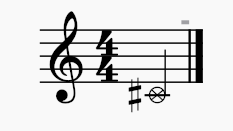

## ActiveSite

A *Music21Object* that is inside one or more Streams should be able to get its most recently referenced stream via its ***.activeSite*** attribute

In [20]:
n.activeSite
# We’ve put n in s, which is called 'empty stream', so n’s .activeSite should be s

<music21.stream.Stream empty_stream>

The activeSite may change over time

In [21]:
t = stream.Stream()
t.id = 'new_stream'
t.insert(4.0, n)

n.activeSite

<music21.stream.Stream new_stream>

We can also change the activeSite

In [22]:
n.activeSite = s
n.activeSite

<music21.stream.Stream empty_stream>

Newly created objects have an *.activeSite* of *None*

In [23]:
m = note.Rest()
m.activeSite is None

True

## offset

The *.offset* of a *Music21Object* is the number of quarter notes from the start of the Stream it is a part of.

The Stream that is referenced is the *.activeSite*

In [24]:
n.activeSite = s
# n was inserted at offset 0 of s ('empty stream') 
n.offset

0.0

In [25]:
n.activeSite = t
# and n was inserted at offset 4 of t ('new stream')
n.offset

4.0

A newly created *Music21Object* can set its offset

In [26]:
n2 = note.Note('G-2')
n2.offset = 20.0
s.insert(n2)
n2.activeSite

<music21.stream.Stream empty_stream>

In [27]:
n2.offset

20.0

## priority

If you have a Stream with two elements at the same offset, how can you know which one of them should come first? 

In [28]:
s = stream.Stream()
d = note.Note('D4')
e = note.Note('E4')
s.insert(0.0, d)
s.insert(0.0, e)
s.show('text')
# D was inserted first, so it comes first

{0.0} <music21.note.Note D>
{0.0} <music21.note.Note E>


In [29]:
d.priority
# .priority is any integer, with a default of zero

0

In [30]:
e.priority = -1
s.show('text')

{0.0} <music21.note.Note E>
{0.0} <music21.note.Note D>


If we return *e*'s priority to the default of 0, it will again appear after *d*

In [31]:
e.priority = 0
s.show('text')

{0.0} <music21.note.Note D>
{0.0} <music21.note.Note E>


## classSortOrder

Sorted special objects to show fristly

In [32]:
tc = clef.TrebleClef()
s.insert(0.0, tc)
s.show('text')

{0.0} <music21.clef.TrebleClef>
{0.0} <music21.note.Note D>
{0.0} <music21.note.Note E>


Why the treble clef comes first?

In [33]:
(tc.priority, d.priority, e.priority)

(0, 0, 0)

It's not because the *Offset*. But the *classSortOrder*

In [35]:
(tc.classSortOrder, d.classSortOrder, e.classSortOrder)
# lower numbers come first

(0, 20, 20)

We’ve arbitrarily placed Clef at 0 and Note at 20 and lots of other Classes in between.

In [36]:
(clef.TrebleClef.classSortOrder, note.Note.classSortOrder)

(0, 20)